<a href="https://colab.research.google.com/github/Avinavshrestha/Tech405-/blob/main/Avinav_Week5_TECH405_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# Load the dataset
data = pd.read_csv('/content/sales-of-shampoo-over-a-three-ye.csv')
data.columns = ['Month', 'Sales']

# Convert 'Month' to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%d-%b', errors='coerce')
data.dropna(subset=['Month'], inplace=True)

# Extract sales data and normalize
sales_data = data['Sales'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_sales = scaler.fit_transform(sales_data)

# Create sequences
def create_sequences(data, sequence_length=3):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 3
X, y = create_sequences(normalized_sales, sequence_length)


In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=100, batch_size=8, verbose=1)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2195
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2429 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2218  
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1603 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1455 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1400 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1009 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1234  
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0847 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0650  
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0698 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0560 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0553 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0545 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0451 
Epoch 16/100
5/5 ━━━━━━━━━━━━

In [ ]:
# Make predictions
predicted = model.predict(X)

# Reverse normalization for better interpretation
predicted_sales = scaler.inverse_transform(predicted)
actual_sales = scaler.inverse_transform(y)

# Print a few predicted vs actual values
for pred, actual in zip(predicted_sales[:5], actual_sales[:5]):
    print(f"Predicted: {pred[0]:.2f}, Actual: {actual[0]:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step
Predicted: 240.03, Actual: 119.30
Predicted: 197.39, Actual: 180.30
Predicted: 203.81, Actual: 168.50
Predicted: 197.25, Actual: 231.80
Predicted: 225.95, Actual: 224.50


Mean Squared Error (MSE): 5599.81
Mean Absolute Error (MAE): 60.67


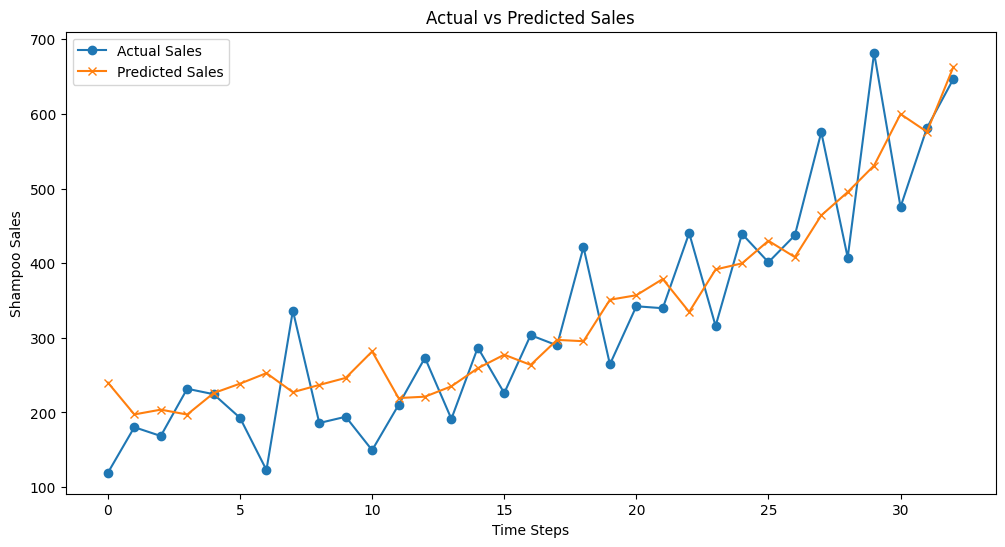

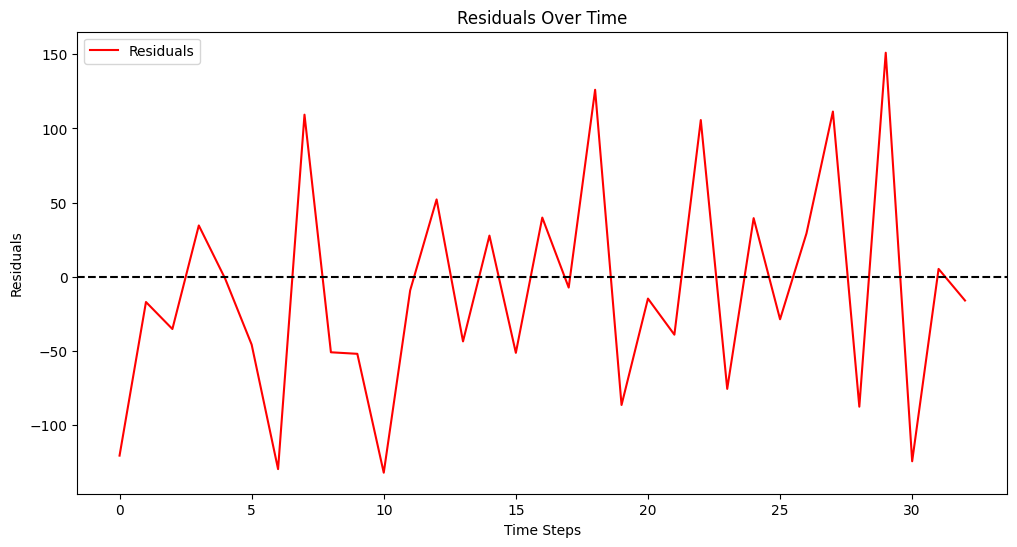

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model
mse = mean_squared_error(actual_sales, predicted_sales)
mae = mean_absolute_error(actual_sales, predicted_sales)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Plot the actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(actual_sales, label="Actual Sales", marker='o')
plt.plot(predicted_sales, label="Predicted Sales", marker='x')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Time Steps")
plt.ylabel("Shampoo Sales")
plt.legend()
plt.show()

# Line plot for residuals over time
plt.figure(figsize=(12, 6))
plt.plot(residuals, label="Residuals", color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Residuals")
plt.legend()
plt.show()
